In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# df --> https://www.kaggle.com/datasets/uciml/iris/data

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# naive bayes classifier

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.drop(columns="Id", axis=1 ,inplace=True)

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df["PetalWidthCm"].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

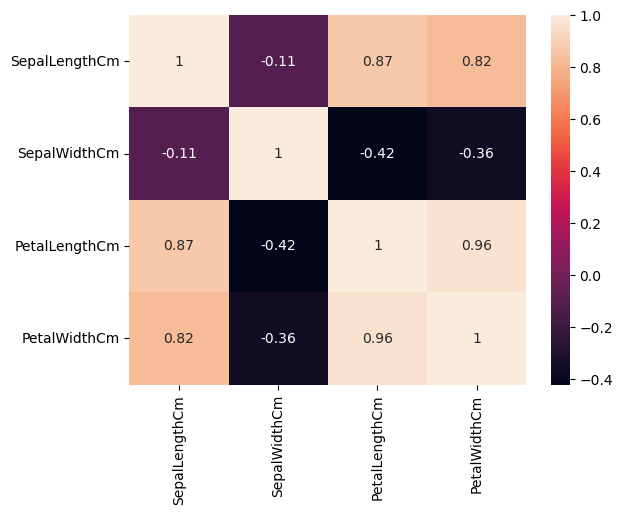

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [12]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

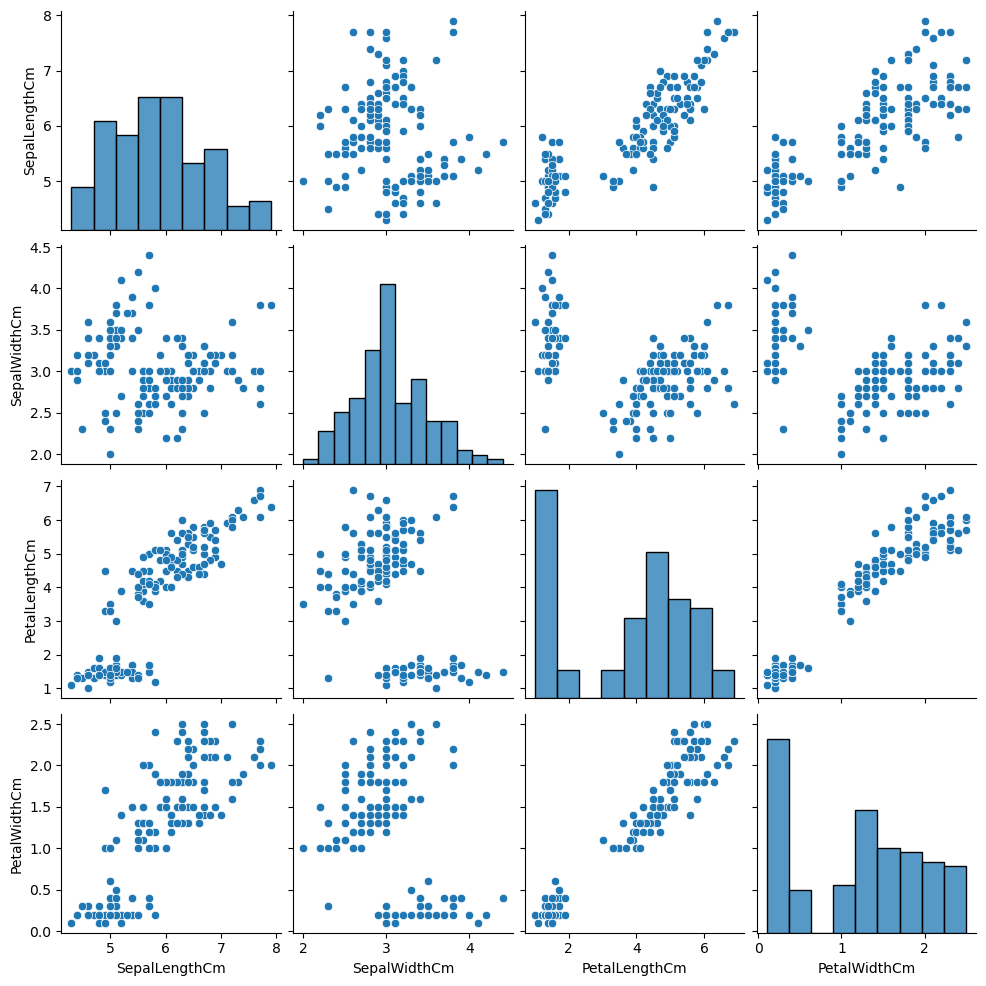

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

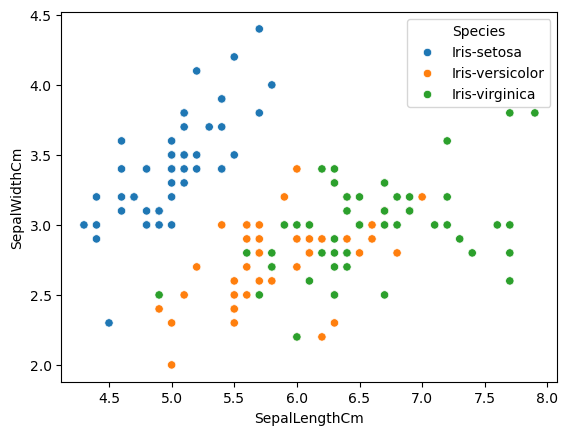

In [15]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df)
plt.show()

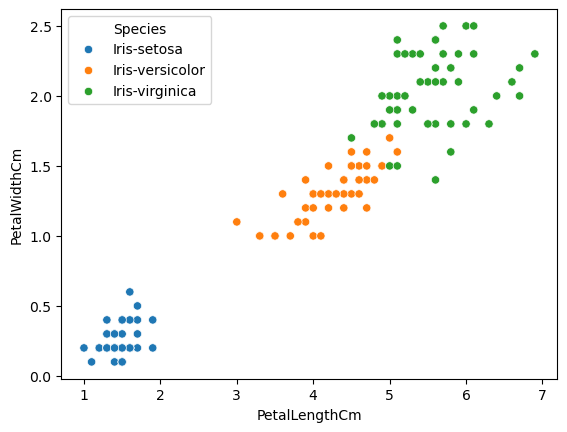

In [16]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()

In [19]:
df["Species"] = label_encoder.fit_transform(df["Species"])

In [20]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [21]:
X = df.drop(columns="Species",axis=1)
y = df["Species"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size = 0.25 , random_state=15)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.33232377, -0.62681446,  0.66032565,  1.03726799],
       [ 0.26456844, -0.41006553,  0.55197953,  0.27477298],
       [-1.52610821,  1.10717694, -1.4524236 , -1.25021704],
       [-1.04859444,  0.89042801, -1.28990442, -1.12313454],
       [ 1.57773132,  0.24018124,  1.25622928,  0.78310298],
       [-1.64548665, -1.71055908, -1.28990442, -1.12313454],
       [ 0.02581156,  0.24018124,  0.60615259,  0.78310298],
       [-0.45170222, -1.71055908,  0.17276813,  0.14769048],
       [ 0.74208222, -0.19331661,  1.14788316,  1.29143299],
       [ 0.9808391 ,  0.02343232,  0.38946036,  0.27477298],
       [ 1.33897443,  0.24018124,  0.55197953,  0.27477298],
       [ 0.86146066, -0.19331661,  0.38946036,  0.27477298],
       [-1.16797288,  0.02343232, -1.18155831, -1.37729955],
       [-1.04859444,  0.67367909, -1.12738525, -0.99605204],
       [ 0.9808391 , -0.19331661,  0.82284482,  1.41851549],
       [-0.21294533, -0.41006553,  0.28111424,  0.14769048],
       [-1.16797288, -0.

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
gnb = GaussianNB()

In [30]:
gnb

GaussianNB()

In [31]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [32]:
y_pred = gnb.predict(X_test_scaled)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
print("accuracy: ",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

accuracy:  0.9734513274336283
[[36  0  0]
 [ 0 38  2]
 [ 0  1 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.95      0.96        40
           2       0.95      0.97      0.96        37

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print("accuracy: ",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

accuracy:  0.9469026548672567
[[36  0  0]
 [ 0 35  2]
 [ 0  4 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      0.95      0.92        37
           2       0.95      0.90      0.92        40

    accuracy                           0.95       113
   macro avg       0.95      0.95      0.95       113
weighted avg       0.95      0.95      0.95       113



In [37]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
print("accuracy: ",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

accuracy:  0.9557522123893806
[[36  0  0]
 [ 0 39  5]
 [ 0  0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.89      0.94        44
           2       0.87      1.00      0.93        33

    accuracy                           0.96       113
   macro avg       0.96      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113

